<a href="https://colab.research.google.com/github/qoo556625/Stock_skyrocket/blob/main/wordcloud2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import timedelta
from datetime import date

f = open("fulltext", "w", encoding="utf-8")
fulltext= ""

for d in range(14):
    now = date.today()
    one_day = timedelta(days=d)
    yesterday = now - one_day
    m= str(yesterday)[-5:-3]
    s= str(yesterday)[-2:]

    url = "https://www.tpex.org.tw/web/stock/historical/active_advanced/rt_rally_print.php?l=zh-tw&t=D&d=110/"+m+"/"+s+"&s=0,asc,1"
    print(url)
    h={
        'Cache-Control': 'max-age=600, private, must-revalidate',
    'Connection': 'Keep-Alive',
    'Content-Security-Policy': "frame-ancestors 'self' *.twse.com.tw *.tdcc.com.tw digitalprocesssys-epassbook.cdn.hinet.net http://digitalprocesssyst-epassbook.cdn.hinet.net;",
    'Content-Type': 'text/html; charset=utf-8',
    'Date': 'Sat 13 Mar 2021 07:43:42 GMT',
    'Keep-Alive': 'timeout=5, max=100',
    'Permissions-Policy': 'accelerometer=(), camera=(), geolocation=(), gyroscope=(), magnetometer=(), microphone=(), payment=(), usb=()',
    'Referrer-Policy': 'strict-origin-when-cross-origin',
    'Server': 'Apache',
    'Strict-Transport-Security': 'max-age=31536000;includeSubdomains; preload',
    'Transfer-Encoding': 'chunked',
    'Vary': 'Origin',
    'X-Content-Type-Options': 'nosniff',
    'X-Frame-Options': 'ALLOW-FROM https://www.tpex.org.tw',
    'X-XSS-Protection': '1;mode=block'
    }
    
    response = requests.get(url,h)
    response.encoding="utf-8"
    html = BeautifulSoup(response.text)
    tr = html.find("body").find("table").find("tbody").find_all("tr")
    for td in tr:
        name = td.find_all("td",align="center")[1].text
        number = td.find("td").text
        if int(number)   <= 50:
            print(name)
            fulltext = fulltext + " "+ name
            fulltext = fulltext.replace("-", "")
            f.write(fulltext)
f.close()


https://www.tpex.org.tw/web/stock/historical/active_advanced/rt_rally_print.php?l=zh-tw&t=D&d=110/03/13&s=0,asc,1
https://www.tpex.org.tw/web/stock/historical/active_advanced/rt_rally_print.php?l=zh-tw&t=D&d=110/03/12&s=0,asc,1
金麗科
錦明實業
淳紳
慶騰精密
天揚
聰泰科技
京晨科
富致
展匯科
九暘
欣普羅
先進光
弘煜科
類比科
李洲科技
普誠科技
紘康
福華電子
致振企業
全宇昕
斐成企業
亞信電子
緯軟
凱鈺科技
寶得利
點序
逸達
啟發電
台灣精星
順達科技
志旭國際
精聯電子
泰金-KY
紅心辣椒
兆遠
茂迪
光耀
亞昕
大世科
生華科
前鼎光電
佶優科技
陸海交通
天宇
智冠
欣厚-KY
旭品
海韻電子
安碁科技
德宏工業
https://www.tpex.org.tw/web/stock/historical/active_advanced/rt_rally_print.php?l=zh-tw&t=D&d=110/03/11&s=0,asc,1
寶島極光
鈺緯
點序
長聖
九暘
大綜
英濟
欣技資訊
及成
富致
力致科技
展匯科
尚凡
普鴻
天品
弘煜科
先進光
致振企業
應廣
福華電子
亞信電子
大世科
建舜電子
金麗科
晉泰科技
北基國際
百徽
得利影視
鴻碩精密
尚茂
力旺電子
嘉鋼
芮特-KY
信驊
撼訊科技
茂達電子
驊訊電子
廣寰科
江興鍛壓
群聯電子
曜越
連展投控
佶優科技
佳邦科技
藥華藥
光耀
蜜望實
富晶通
廣錠
環球晶
https://www.tpex.org.tw/web/stock/historical/active_advanced/rt_rally_print.php?l=zh-tw&t=D&d=110/03/10&s=0,asc,1
弘煜科
華鎂鑫
匯鑽科
光環
富致
萬國通路
點序
寶得利
天品
前鼎光電
茂迪
普鴻
九暘
華星光
先進光
笙泉
茂達電子
中美實
力新國際
亞信電子
福華電子
星寶國際
大世科
易飛網
沛亨半導
地心引力
德宏工業
新鉅科
慶生電子
保瑞
友威科
華研
達邦

In [3]:
!pip install wordcloud

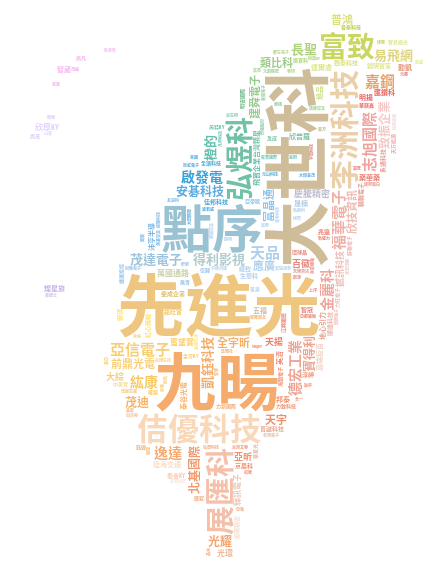

In [5]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import os
# matplotlib inline
mask_path = "map.jpg"
mask = np.array(Image.open(mask_path))

wc = WordCloud(font_path = "./NotoSansMonoCJKtc-Bold.otf",
               background_color="white", max_words=5000,
               mask=mask,collocations=False)
fulltext = open("fulltext","r",encoding="utf-8").read()

wc.generate(fulltext)

color = ImageColorGenerator(mask)
wc.recolor(color_func = color)

wc.to_file("./result_cloud.png")
wc.to_image()